# **1.YOLOv8-s Baseline Detector**

**YOLOv8-s baseline WBC specialist training code**

train_yolov8s_wbc_baseline — the YOLOv8-s (small variant) training script.

In [ ]:
#Step 1 – Mount Drive & define paths

In [ ]:
from google.colab import drive
from pathlib import Path

drive.mount('/content/drive', force_remount=True)

ROOT = Path("/content/drive/MyDrive/urine_uti/ml-services/kasundi")
DATA = ROOT / "data/processed/wbc_detect"   # from notebook 01
CFG  = ROOT / "configs/wbc.yaml"
RESULTS_DIR = ROOT / "results/wbc_specialist"  # new folder for all outputs

# make sure results folder exists
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

Mounted at /content/drive


In [ ]:
#Step 2 – Confirm dataset exists
!ls -R "$DATA" | head -30

/content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect:
images
labels

/content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images:
test
train
val

/content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images/test:
111.jpg
119.jpg
165.jpg
166.jpg
177.jpg
178.jpg
191.jpg
194.jpg
201.jpg
223.jpg
238.jpg
23.jpg
251.jpg
264.jpg
272.jpg
326.jpg
378.jpg
3.jpg
419.jpg
424.jpg


In [ ]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Try both common roots — pick the one that actually exists
roots_to_try = [
    Path("/content/drive/MyDrive/urine_uti/ml-services/member1"),
    Path("/content/drive/MyDrive/urine_uti/ml-services/kasundi"),
]
ROOT = next((r for r in roots_to_try if r.exists()), None)
assert ROOT is not None, "Couldn't find your project root. Check your Drive folder name."

# Find the processed dataset folder created by the conversion notebook
candidates = list(ROOT.glob("data/processed/wbc_detect"))
assert candidates, f"No processed dataset found under {ROOT}. Did you run the conversion notebook?"
DATA = candidates[0]
print("Project root:", ROOT)
print("WBC dataset:", DATA)

# Make results + configs folders
RESULTS_DIR = ROOT / "results/wbc_specialist"
RESULTS_DIR.mkdir(parents=True, exist_ok=True)
CFG = ROOT / "configs/wbc.yaml"
CFG.parent.mkdir(parents=True, exist_ok=True)

# Write YOLO data config (or overwrite safely)
CFG.write_text(f"""path: {DATA}
train: images/train
val: images/val
test: images/test
names:
  0: WBC
""")
print("Wrote config to:", CFG)

Mounted at /content/drive
Project root: /content/drive/MyDrive/urine_uti/ml-services/kasundi
WBC dataset: /content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect
Wrote config to: /content/drive/MyDrive/urine_uti/ml-services/kasundi/configs/wbc.yaml


In [ ]:
#Install and train YOLO

In [ ]:
!pip install -q ultralytics
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # small variant

model.train(
    data=str(CFG),
    imgsz=896,
    epochs=200,
    batch=16,
    mosaic=0.7, mixup=0.1,
    degrees=10, scale=0.2, translate=0.1,
    patience=30,
    project=str(RESULTS_DIR),  # save logs & weights here
    name='train_run'           # run folder inside results
)

TRAIN_DIR = Path(train_res.save_dir)      # e.g. .../train_run3
BEST_PT   = TRAIN_DIR / "weights" / "best.pt"
print("TRAIN_DIR:", TRAIN_DIR)
print("BEST_PT exists?", BEST_PT.exists())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/urine_uti/ml-services/kasundi/configs/wbc.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed25d6d5c70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
#Evaluate model & export metrics

In [ ]:
from pathlib import Path
TRAIN_DIR = Path(RESULTS_DIR) / "train_run3"
BEST_PT   = TRAIN_DIR / "weights" / "best.pt"
print("TRAIN_DIR:", TRAIN_DIR)
print("BEST_PT exists?", BEST_PT.exists())

TRAIN_DIR: /content/drive/MyDrive/urine_uti/ml-services/kasundi/results/wbc_specialist/train_run3
BEST_PT exists? True


In [ ]:
import shutil, datetime
stamp = datetime.datetime.now().strftime("%Y%m%d_%H%M")
summary = RESULTS_DIR / f"summary_{stamp}"
summary.mkdir(exist_ok=True)

# always copy best.pt from TRAIN_DIR
shutil.copy(BEST_PT, summary / "best.pt")

# optional training artifacts
for rel in ["results.csv", "results.png", "confusion_matrix.png"]:
    src = TRAIN_DIR / rel
    if src.exists():
        shutil.copy(src, summary / rel)

# optional: include eval_run plots if you DID run model.val(name='eval_run')
EVAL_DIR = RESULTS_DIR / "eval_run"
for fname in [
    "confusion_matrix.png", "confusion_matrix_normalized.png",
    "BoxPR_curve.png", "BoxP_curve.png", "BoxR_curve.png", "BoxF1_curve.png",
    "predictions.json", "val_batch0_labels.jpg", "val_batch0_pred.jpg"
]:
    src = EVAL_DIR / fname
    if src.exists():
        shutil.copy(src, summary / fname)

print("✅ Saved summary to:", summary)


✅ Saved summary to: /content/drive/MyDrive/urine_uti/ml-services/kasundi/results/wbc_specialist/summary_20251026_1739


Columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


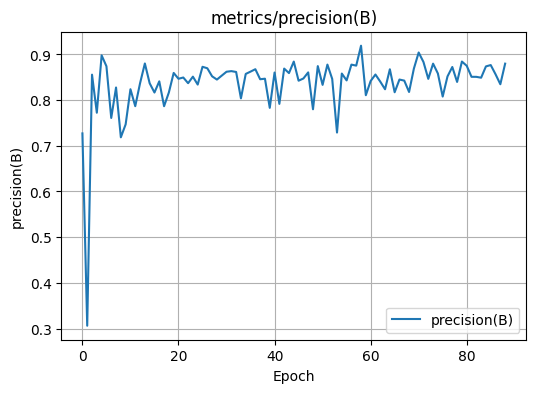

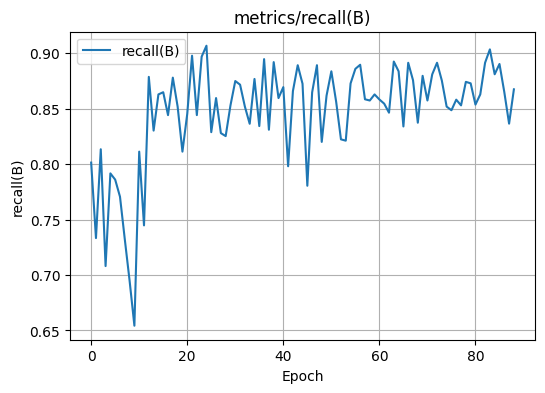

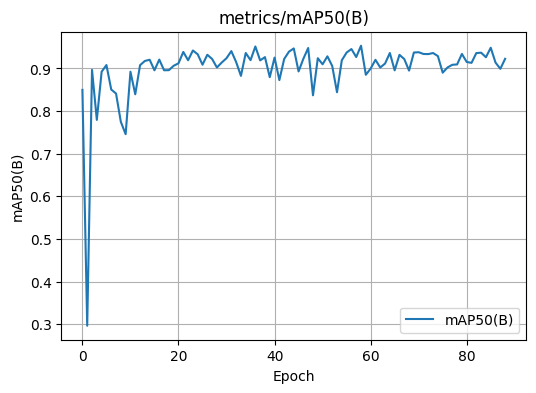

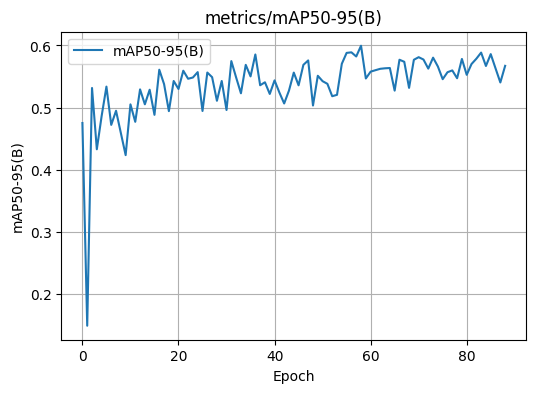

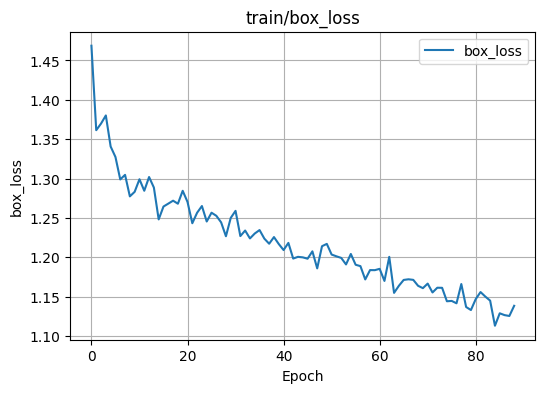

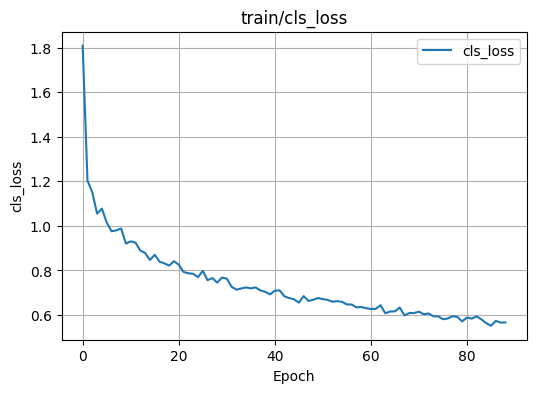

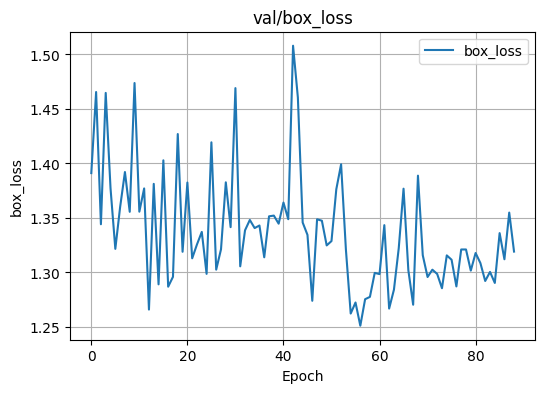

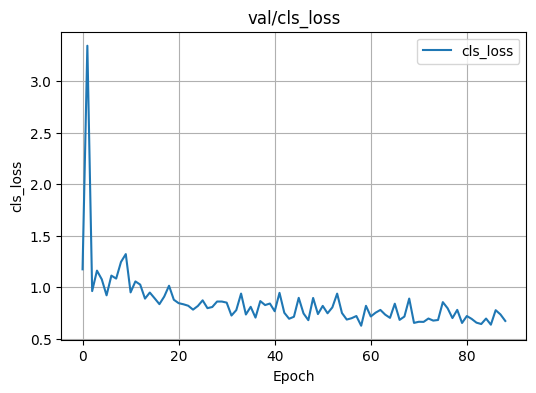

In [ ]:
# --- 1. Plot training metrics ---
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Path to your YOLO results folder
RESULTS_DIR = Path("/content/drive/MyDrive/urine_uti/ml-services/kasundi/results/wbc_specialist/train_run3")

# Read metrics
csv_path = RESULTS_DIR / "results.csv"
df = pd.read_csv(csv_path)

# Available columns
print("Columns:", list(df.columns))

metrics = [
    "metrics/precision(B)",
    "metrics/recall(B)",
    "metrics/mAP50(B)",
    "metrics/mAP50-95(B)",
    "train/box_loss",
    "train/cls_loss",
    "val/box_loss",
    "val/cls_loss"
]

# Plot metrics
for col in metrics:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        plt.plot(df[col], label=col.split("/")[-1])
        plt.title(col)
        plt.xlabel("Epoch")
        plt.ylabel(col.split("/")[-1])
        plt.grid(True)
        plt.legend()
        plt.show()

In [ ]:
# --- 2. Generate Confusion Matrix ---
from ultralytics import YOLO
from pathlib import Path

best_weights = RESULTS_DIR / "weights" / "best.pt"
model = YOLO(best_weights)

results = model.val(
    data="/content/drive/MyDrive/urine_uti/ml-services/kasundi/configs/wbc.yaml",  # or str(CFG)
    imgsz=896,
    split="val",      # or "test" if you want test results
    conf=0.25,
    iou=0.5,
    save_conf=True,
    save_json=True,
    save_txt=False,
    plots=True
)

print("Confusion matrix saved in:", results.save_dir)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 18.9±40.2 ms, read: 27.3±26.3 MB/s, size: 85.2 KB)
val: Scanning /content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/labels/val.cache... 256 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 256/256 322.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 2.3it/s 7.0s
                   all        256        911       0.92      0.859       0.94      0.611
Speed: 4.3ms preprocess, 11.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Saving /content/runs/detect/val/predictions.json...
Results saved to /content/runs/detect/val
Confusion matrix saved in: /content/runs/detect/val



image 1/87 /content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images/test/111.jpg: 512x896 4 WBCs, 42.6ms
image 2/87 /content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images/test/119.jpg: 512x896 6 WBCs, 16.8ms
image 3/87 /content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images/test/165.jpg: 512x896 2 WBCs, 16.9ms
image 4/87 /content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images/test/166.jpg: 512x896 5 WBCs, 16.9ms
image 5/87 /content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images/test/177.jpg: 512x896 2 WBCs, 16.9ms
image 6/87 /content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images/test/178.jpg: 512x896 12 WBCs, 16.8ms
image 7/87 /content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images/test/191.jpg: 512x896 3 WBCs, 16.8ms
image 8/87 /content/drive/MyDrive/urine_uti/ml-services/kasu

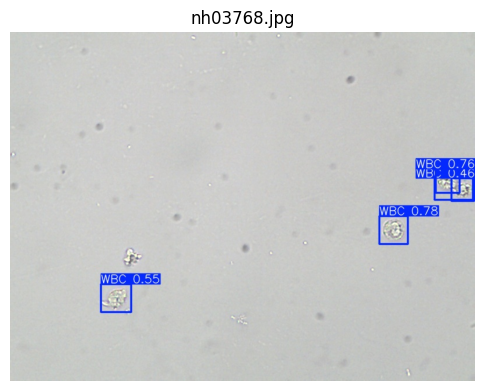

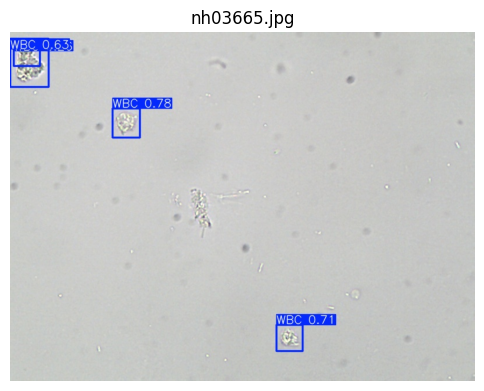

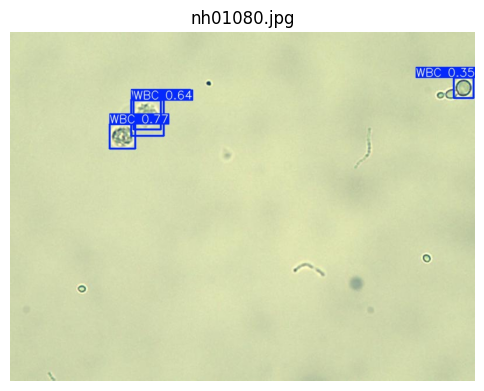

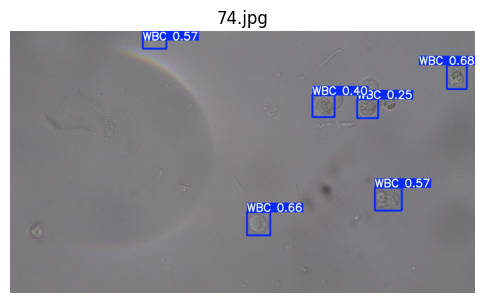

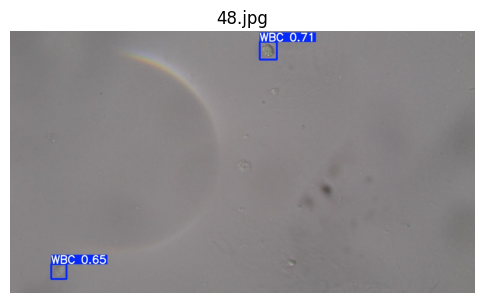

In [ ]:
# --- 3. Run Predictions on Sample Images ---
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

best_weights = RESULTS_DIR / "weights" / "best.pt"
model = YOLO(best_weights)

# Folder with test images
TEST_IMG_DIR = Path("/content/drive/MyDrive/urine_uti/ml-services/kasundi/data/processed/wbc_detect/images/test")

# Run inference
pred_dir = Path("/content/predictions")
model.predict(
    source=str(TEST_IMG_DIR),
    conf=0.25,
    imgsz=896,
    save=True,
    project=str(pred_dir),
    name="wbc_predictions"
)

# Display a few predictions
out_dir = pred_dir / "wbc_predictions"
images = list(out_dir.glob("*.jpg"))[:5]  # show first 5
for img_path in images:
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(img_path.name)
    plt.axis("off")
    plt.show()